# Первичная очистка и анализ текстового файла *anek.txt*

In [2]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
import csv
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator
from nltk.corpus import stopwords
import numpy as np
import nltk
from nltk import ngrams

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/anastasia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
with open('anek.txt', 'r') as input_file:
    lines = input_file.readlines()
sorted_lines = []
for line in lines:
    if line != '\n' and '@' not in line: # анекдоты с м@т@ми 
        sorted_lines.append(line)

In [34]:
beginning ='<|startoftext|>'
cleaned = []
for line in sorted_lines:
    if line.startswith(beginning):
        new_line = line.replace(beginning, '')
        if new_line[-1] == '\n':
            cleaned.append(new_line[:-1])
        else:
            cleaned.append(new_line)
    else:
        cleaned.append(line)

In [35]:
df = pd.DataFrame(cleaned, columns = ['text'])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122086 entries, 0 to 122085
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    122086 non-null  object
dtypes: object(1)
memory usage: 953.9+ KB


In [37]:
df.head(5)

,text
0,"Друзья мои, чтобы соответствовать вам, я готов..."
1,"- А вот скажи честно, ты во сне храпишь?- Поня..."
2,"Поссорилась с мужем. Пока он спал, я мысленно ..."
3,Если тебя посещают мысли о смерти - это еще по...
4,"Все мне говорили, что у меня ничего не получит..."


In [38]:
df.to_csv('anek.csv', index = False)

In [10]:
df = pd.read_csv('anek.csv')

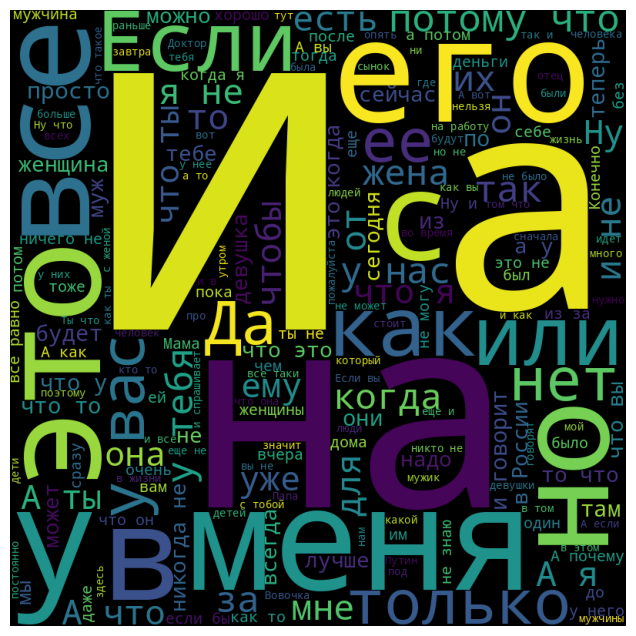

In [11]:
all_words = ' '.join(df['text'].astype('str'))
wordcloud = WordCloud(width = 800, height = 800).generate(all_words)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [12]:
def preprocess_text(text: str) -> str:
    """
    Функция для удаления пунктуации из текста
    """
    return re.sub(r"[^\w\s]+", '', text).lower()
    
def remove_from_text(text: str) -> str:
    """
    Функция для удаления стоп-слов из текста
    """
    words = text.split()
    filtered_words = [word for word in words if word not in stopwords.words('russian')]
    return ' '.join(filtered_words)

class RemoveStopWords(BaseEstimator):
    """
    Класс для удаления стоп-слов из набора текстов
    """
    def fit(self, x, y=None):
        return self
    
    def transform(self, x):
        return np.array(list(map(lambda x: ''.join(remove_from_text(x)), x)))

In [13]:
df['text_preprocessed'] = df['text'].apply(preprocess_text)

In [14]:
df['text_withoutStops'] = RemoveStopWords().transform(df['text_preprocessed'])

In [16]:
df.head(5)

,text,text_preprocessed,text_withoutStops
0,"Друзья мои, чтобы соответствовать вам, я готов...",друзья мои чтобы соответствовать вам я готов с...,друзья мои соответствовать готов сделать собой...
1,"- А вот скажи честно, ты во сне храпишь?- Поня...",а вот скажи честно ты во сне храпишь понятие ...,скажи честно сне храпишь понятие имею вроде со...
2,"Поссорилась с мужем. Пока он спал, я мысленно ...",поссорилась с мужем пока он спал я мысленно ра...,поссорилась мужем пока спал мысленно развелась...
3,Если тебя посещают мысли о смерти - это еще по...,если тебя посещают мысли о смерти это еще пол...,посещают мысли смерти это полбеды беда это сме...
4,"Все мне говорили, что у меня ничего не получит...",все мне говорили что у меня ничего не получитс...,говорили получится сдался доказал правы


In [88]:
import random
n = random.randint(1,122085)
df.iloc[n,2]

'мама укусила стала мамой'

In [17]:
from collections import Counter
words = [word for line in df['text_withoutStops'] for word in line.split()]
word_counts = Counter(words)
most_common_words = word_counts.most_common(10)
print(most_common_words)

[('это', 17297), ('почему', 5428), ('говорит', 3817), ('тебе', 3791), ('жена', 3672), ('очень', 3027), ('просто', 2930), ('сегодня', 2665), ('время', 2633), ('муж', 2358)]


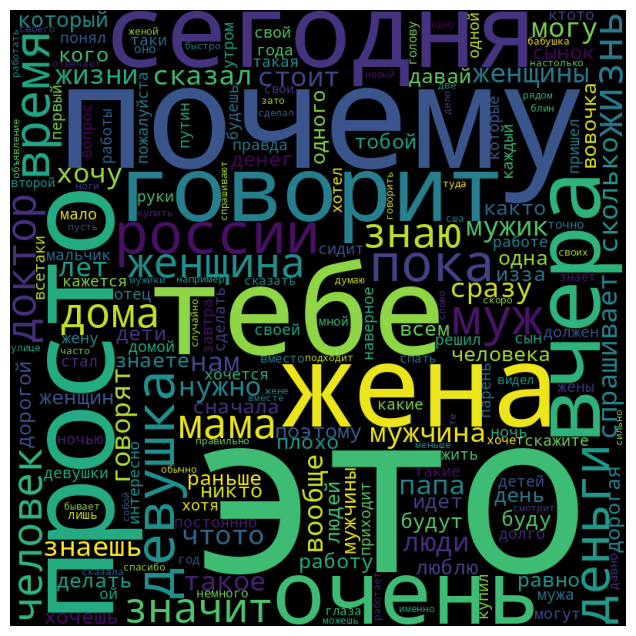

In [18]:
all_words_withoutStops = ' '.join(df['text_withoutStops'].astype('str'))
wordcloud = WordCloud(width = 800, height = 800).generate(all_words_withoutStops)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

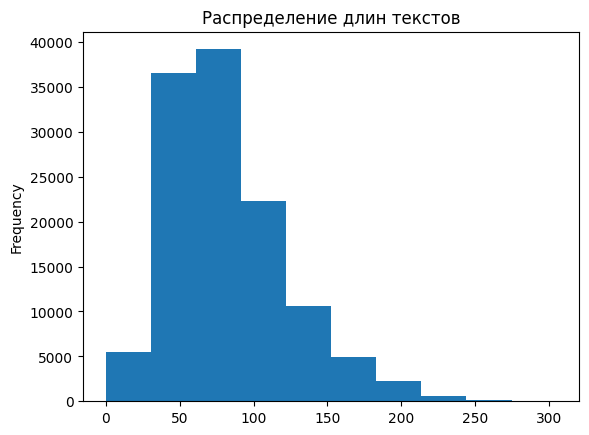

In [19]:
df['text_length'] = df['text_withoutStops'].apply(len)
df['text_length'].plot(kind='hist', title='Распределение длин текстов')
plt.show()

In [34]:
first_words = df['text_withoutStops'].apply(lambda x: x.split()[0] if len(x.split()) > 0 else '')
last_words = df['text_withoutStops'].apply(lambda x: x.split()[-1] if len(x.split()) > 0 else '')
df_top_first = pd.DataFrame(Counter(first_words).most_common(10), columns=['top first words', 'Frequency'])
df_top_last = pd.DataFrame(Counter(last_words).most_common(10), columns=['top last words', 'Frequency'])
df_tops=pd.concat([df_top_first, df_top_last], axis=1)
df_tops

,top first words,Frequency,top last words,Frequency
0,почему,1517,деньги,265
1,жена,1137,это,263
2,девушка,969,россии,228
3,доктор,876,жизни,226
4,вчера,856,лет,223
5,муж,797,дома,200
6,это,704,денег,193
7,сегодня,681,жизнь,185
8,женщина,608,день,171
9,мама,601,года,146


In [24]:
n_gram = 3
bigrams = ngrams(' '.join(df['text_withoutStops']).split(), n_gram)
bigram_counts = Counter(bigrams)
df_3_grams = pd.DataFrame(bigram_counts.most_common(10), columns=['3-gram', 'Frequency'])
df_3_grams

,3-gram,Frequency
0,"(тех, пор, пока)",89
1,"(жена, говорит, мужу)",69
2,"(это, человек, который)",57
3,"(вирус, вирус, вирус)",34
4,"(муж, приходит, домой)",31
5,"(муж, говорит, жене)",29
6,"(сборной, россии, футболу)",28
7,"(3, часа, ночи)",27
8,"(почему, сих, пор)",27
9,"(жена, спрашивает, мужа)",26


In [36]:
df_res = df[['text', 'text_preprocessed', 'text_withoutStops']]

In [39]:
df_res.to_csv('anek_preprocessed.csv', index = False)